### **SIFT(Scale-Invariant Feature Transform)**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
img=cv2.imread('CV-1.jpg')

# Converting image to grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Apply the SIFT  Detector

sift = cv2.SIFT_create() # Initialize sift algorithm

In [4]:
# Detecting key points & computing the descriptor
kp,des=sift.detectAndCompute(gray,None)

In [5]:
# Marking the key points on the image
img_with_key_points=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

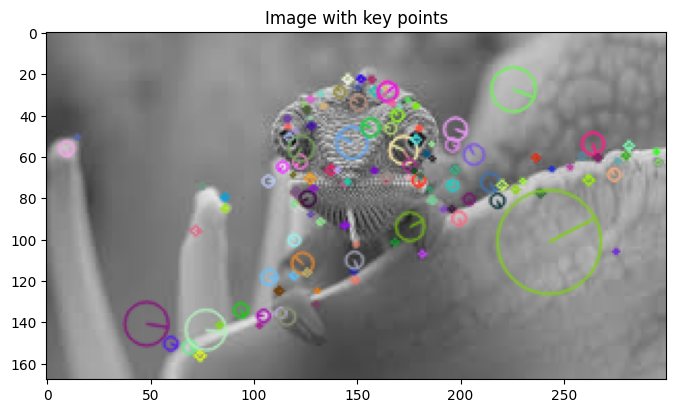

In [6]:
# Plot the image
img_with_key_points=cv2.cvtColor(img_with_key_points, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img_with_key_points)
plt.title("Image with key points")
plt.show()

In [7]:
# Print the number of keypoints
print(f"Number of keypoints:{len(kp)}")

Number of keypoints:140


In [8]:
# Matching the images
# Load two images
img1=cv2.imread('CV-1.jpg',cv2.IMREAD_GRAYSCALE)
img2=cv2.imread('CV-1.jpg',cv2.IMREAD_GRAYSCALE)

In [9]:
# Apply SIFT  Detector
sift=cv2.SIFT_create()
kp1,des1=sift.detectAndCompute(gray,None)
kp2,des2=sift.detectAndCompute(gray,None)


In [10]:
# Match descriptors using BruteForce Matcher
bf=cv2.BFMatcher(cv2.NORM_L2,crossCheck=True)

# NORM_L2 : Euclidean distance for descriptor comparison
# CrossCheck : Trie for mutual best matches

matches=bf.match(des1,des2)

# Sort matches by distance
matches=sorted(matches,key=lambda x:x.distance)

In [11]:
# Draw best matches
matched_images =cv2.drawMatches(img1,kp1,img2,kp2,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

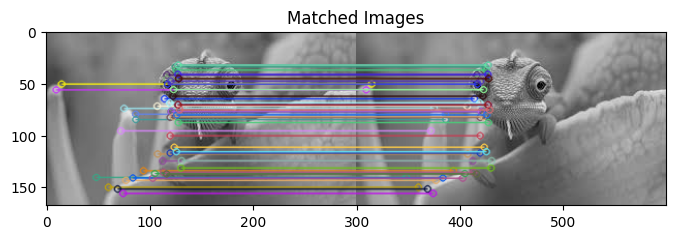

In [12]:
# Plot the matched images
matched_images=cv2.cvtColor(matched_images, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(matched_images)
plt.title("Matched Images")
plt.show()